In [57]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [58]:
#read csv data
data=pd.read_csv("loan.csv",sep=',',header=0,index_col=0)
pd.set_option('display.max_column',None)
data.head()

,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,1,NaN,NaN,3,0,13648,83.70%,9,f,0.00,0.00,5863.155187,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,NaN,May-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0,Apr-99,5,NaN,NaN,3,0,1687,9.40%,4,f,0.00,0.00,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,small_business,real estate business,606xx,IL,8.72,0,Nov-01,2,NaN,NaN,2,0,2956,98.50%,10,f,0.00,0.00,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,NaN,May-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0,Feb-96,1,35.0,NaN,10,0,5598,21%,37,f,0.00,0.00,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,NaN,Apr-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN

In [59]:
# how many null values each columns have
data.isnull().sum()

member_id                             0
loan_amnt                             0
funded_amnt                           0
funded_amnt_inv                       0
term                                  0
int_rate                              0
installment                           0
grade                                 0
sub_grade                             0
emp_title                          2459
emp_length                         1075
home_ownership                        0
annual_inc                            0
verification_status                   0
issue_d                               0
loan_status                           0
pymnt_plan                            0
url                                   0
desc                              12940
purpose                               0
title                                11
zip_code                              0
addr_state                            0
dti                                   0
delinq_2yrs                           0


In [60]:
# delete column which have null values more then 50% 
data.dropna(axis=1,thresh=int(len(data)*0.5),inplace=True)

In [61]:
#column after deleting some column which has null values more then 50% 
data.isnull().sum()

member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
term                              0
int_rate                          0
installment                       0
grade                             0
sub_grade                         0
emp_title                      2459
emp_length                     1075
home_ownership                    0
annual_inc                        0
verification_status               0
issue_d                           0
loan_status                       0
pymnt_plan                        0
url                               0
desc                          12940
purpose                           0
title                            11
zip_code                          0
addr_state                        0
dti                               0
delinq_2yrs                       0
earliest_cr_line                  0
inq_last_6mths                    0
open_acc                    

In [62]:
# filling the empty values in column emp_title
data['emp_title'].fillna('Other',inplace=True)

In [63]:
# drop some unnecessary column which is not required
data.drop(['member_id','tax_liens','delinq_amnt','desc','pymnt_plan','url','initial_list_status','out_prncp','out_prncp_inv','collections_12_mths_ex_med','policy_code','pub_rec_bankruptcies'],axis=1,inplace=True)

In [64]:
# how many null values columns have 
data.isnull().sum()

loan_amnt                      0
funded_amnt                    0
funded_amnt_inv                0
term                           0
int_rate                       0
installment                    0
grade                          0
sub_grade                      0
emp_title                      0
emp_length                  1075
home_ownership                 0
annual_inc                     0
verification_status            0
issue_d                        0
loan_status                    0
purpose                        0
title                         11
zip_code                       0
addr_state                     0
dti                            0
delinq_2yrs                    0
earliest_cr_line               0
inq_last_6mths                 0
open_acc                       0
pub_rec                        0
revol_bal                      0
revol_util                    50
total_acc                      0
total_pymnt                    0
total_pymnt_inv                0
total_rec_

In [65]:
#shape after delete some unnecessary data 
data.shape

(39717, 41)

In [66]:
# calculating some statistical data with describe method
data['loan_amnt'].describe()

count    39717.000000
mean     11219.443815
std       7456.670694
min        500.000000
25%       5500.000000
50%      10000.000000
75%      15000.000000
max      35000.000000
Name: loan_amnt, dtype: float64

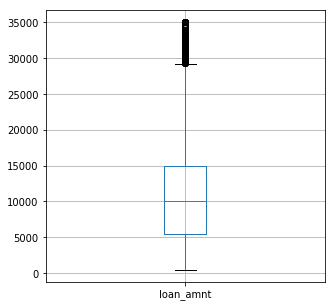

In [67]:
# figuring out the outliers
data.boxplot(column=['loan_amnt'],figsize=(5,5))

In [68]:
# deleting outliers
num = data["loan_amnt"].quantile(0.96)
data = data[data["loan_amnt"] < num]
data["loan_amnt"].describe()

count    38128.000000
mean     10362.193795
std       6256.199037
min        500.000000
25%       5000.000000
50%       9450.000000
75%      14800.000000
max      25475.000000
Name: loan_amnt, dtype: float64

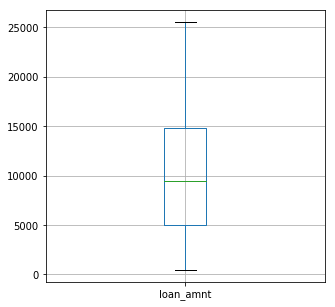

In [69]:
# plotting the box plot after removing all outliers
data.boxplot(column=['loan_amnt'],figsize=(5,5))

In [15]:
data['installment'].describe()

count    38128.000000
mean       304.078296
std        182.890936
min         15.690000
25%        163.670000
50%        271.005000
75%        402.800000
max        950.120000
Name: installment, dtype: float64

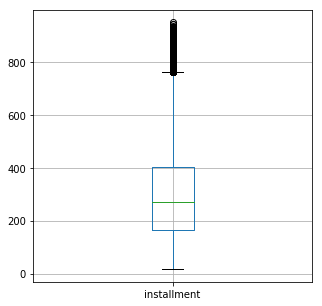

In [70]:
data.boxplot(column=['installment'],figsize=(5,5))

In [71]:
num = data["installment"].quantile(0.96)
data = data[data["installment"] < num]
data["installment"].describe()

count    36602.000000
mean       283.647399
std        155.684976
min         15.690000
25%        161.005000
50%        261.265000
75%        384.667500
max        686.960000
Name: installment, dtype: float64

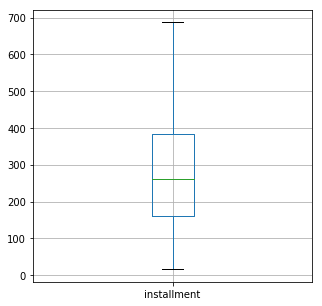

In [72]:
data.boxplot(column=['installment'],figsize=(5,5))

In [73]:
data['annual_inc'].describe()

count    3.660200e+04
mean     6.517982e+04
std      6.179845e+04
min      4.000000e+03
25%      4.000000e+04
50%      5.500000e+04
75%      7.800000e+04
max      6.000000e+06
Name: annual_inc, dtype: float64

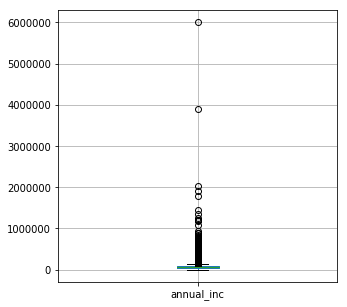

In [74]:
data.boxplot(column=['annual_inc'],figsize=(5,5))

In [75]:
num = data["annual_inc"].quantile(0.95)
data = data[data["annual_inc"] < num]
data["annual_inc"].describe()

count     34682.000000
mean      57885.934766
std       25365.605000
min        4000.000000
25%       39000.000000
50%       54000.000000
75%       74000.000000
max      129996.000000
Name: annual_inc, dtype: float64

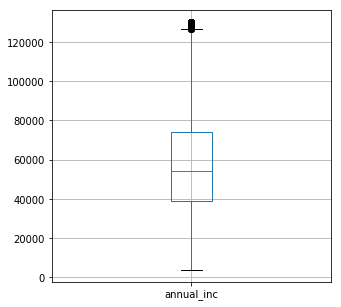

In [76]:
data.boxplot(column=['annual_inc'],figsize=(5,5))

In [77]:
# calculating statistical data after removal of outliers
data.describe(include='all')

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,application_type,acc_now_delinq,chargeoff_within_12_mths
count,34682.000000,34682.000000,34682.000000,34682,34682,34682.000000,34682,34682,34682,33668,34682,34682.000000,34682,34682,34682,34682,34671,34682,34682,34682.000000,34682.000000,34682,34682.000000,34682.000000,34682.000000,34682.000000,34634,34682.000000,34682.000000,34682.000000,34682.000000,34682.000000,34682.000000,34682.000000,34682.00000,34618,34682.000000,34680,34682,34682.0,34639.0
unique,NaN,NaN,NaN,2,361,NaN,7,35,25696,11,5,NaN,3,55,3,14,17517,816,50,NaN,NaN,519,NaN,NaN,NaN,NaN,1081,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,101,NaN,105,1,NaN,NaN
top,NaN,NaN,NaN,36 months,10.99%,NaN,B,A4,Other,10+ years,RENT,NaN,Not Verified,Dec-11,Fully Paid,debt_consolidation,Debt Consolidation,945xx,CA,NaN,NaN,Oct-99,NaN,NaN,NaN,NaN,0%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,May-16,NaN,May-16,INDIVIDUAL,NaN,NaN
freq,NaN,NaN,NaN,25825,818,NaN,10562,2638,2103,7242,17428,NaN,16026,1911,28865,16153,1838,470,6116,NaN,NaN,330,NaN,NaN,NaN,NaN,851,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1006,NaN,8819,34682,NaN,NaN
mean,9626.357332,9413.976270,8957.543960,NaN,NaN,278.610426,NaN,NaN,NaN,NaN,NaN,57885.934766,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13.469161,0.145609,NaN,0.861629,9.072487,0.058416,11450.416470,NaN,21.182631,10394.113156,9905.284414,8445.969482,1871.120175,1.235083,75.788490,9.71237,NaN,2245.600642,NaN,NaN,0.0,0.0
std,5667.144456,5438.169263,5438.215582,NaN,NaN,153.609862,NaN,NaN,NaN,NaN,NaN,25365.605000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.689067,0.491345,NaN,1.059964,4.320891,0.243934,12679.453081,NaN,11.070320,6913.062431,6882.896542,5451.197968,2002.452526,6.416117,534.383909,119.38335,NaN,3561.169851,NaN,NaN,0.0,0.0
min,500.000000,500.000000,0.000000,NaN,NaN,15.690000,NaN,NaN,NaN,NaN,NaN,4000.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,NaN,0.000000,2.000000,0.000000,0.000000,NaN,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,NaN,0.000000,NaN,NaN,0.0,0.0
25%,5000.000000,5000.000000,4868.412336,NaN,NaN,157.937500,NaN,NaN,NaN,NaN,NaN,39000.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.340000,0.000000,NaN,0.000000,6.000000,0.000000,3402.250000,NaN,13.000000,5229.159385,4738.072500,4100.000000,607.075000,0.000000,0.000000,0.00000,NaN,202.512500,NaN,NaN,0.0,0.0
50%,8500.000000,8400.000000,8000.000000,NaN,NaN,256.070000,NaN,NaN,NaN,NaN,NaN,54000.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13.580000,0.000000,NaN,1.000000,8.000000,0.000000,8060.000000,NaN,20.000000,8911.486249,8396.270000,7500.000000,1201.920000,0.000000,0.000000,0.00000,NaN,471.325000,NaN,NaN,0.0,0.0
75%,13000.000000,12800.000000,12000.000000,NaN,NaN,376.155000,NaN,NaN,NaN,NaN,NaN,74000.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.780000,0.000000,NaN,1.000000,11.000000,0.000000,15073.750000,NaN,28.000000,14336.989343,13803.807500,12000.000000,2351.207500,0.000000,0.000000,0.00000,NaN,2907.120000,NaN,NaN,0.0,0.0


In [78]:
data['loan_status'].value_counts()

Fully Paid     28865
Charged Off     4912
Current          905
Name: loan_status, dtype: int64

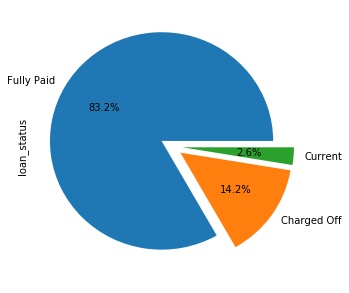

In [79]:
data['loan_status'].value_counts().plot.pie(explode=(0.1,0.1,0.1),figsize=(5,5),autopct='%1.1f%%')

In [80]:
# We only need only Fully Paid and Charged off loan status

data= data.loc[data['loan_status'].isin(['Fully Paid', 'Charged Off'])]

In [81]:
#Shape after only take loan status- fully paid and Charged off
data.shape

(33777, 41)

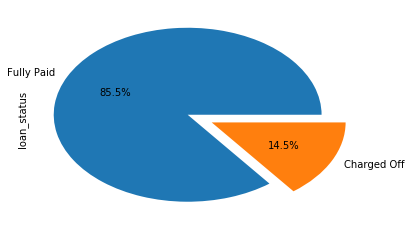

In [82]:
# loan status by pie chart 

data['loan_status'].value_counts().plot.pie(explode=(0.1,0.1),autopct='%1.1f%%')

Text(0,0.5,'Numner of Loans Funded')

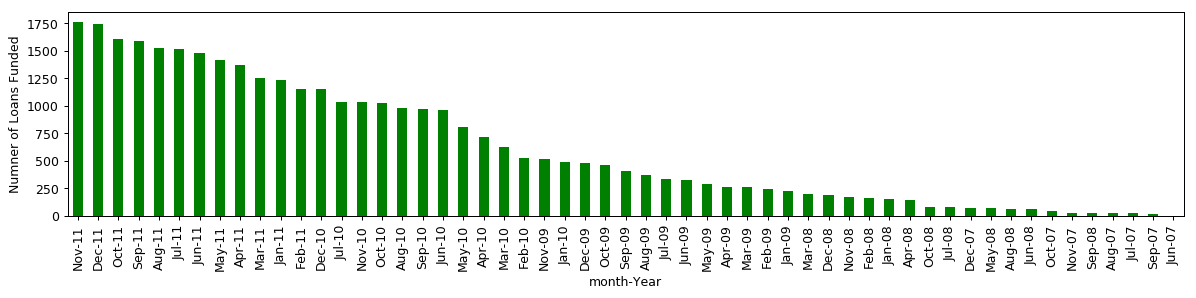

In [83]:
# analysis that in which month-year how many number of loans funded

plt.figure(figsize=(16,3),dpi=90)
data['issue_d'].value_counts().plot.bar(color='green')
plt.xlabel('month-Year')
plt.ylabel('Numner of Loans Funded')

In [84]:
# description on loan amount 
data['loan_amnt'].describe()

# min loan amount is- 500 and max is 35000 and mean of loan amount is 11047

count    33777.000000
mean      9505.284661
std       5599.893240
min        500.000000
25%       5000.000000
50%       8400.000000
75%      13000.000000
max      25475.000000
Name: loan_amnt, dtype: float64

In [85]:
# analysis on loan status and loan amount
data.groupby('loan_status')['loan_amnt'].describe()
# we can clearly see Charged off loan status has more mean value than fully paid loan status

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,4912.0,10261.431189,6144.368808,900.0,5000.0,9500.0,15000.0,25475.0
Fully Paid,28865.0,9376.610081,5491.635570,500.0,5000.0,8075.0,12500.0,25475.0


In [86]:
# analysis on term duration that what percent loan funded for which term duration
data['term'].value_counts(normalize=True)

 36 months    0.764574
 60 months    0.235426
Name: term, dtype: float64

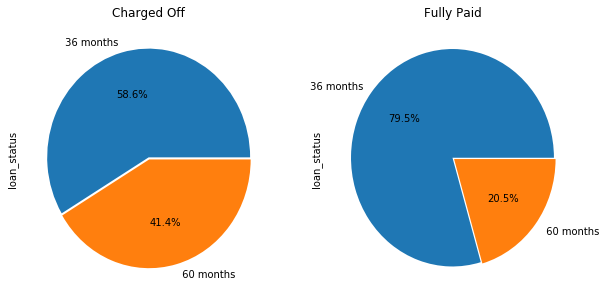

In [87]:
# number of loan funded with term duration,only Charged off loan status
plt.figure(figsize=(10,5))
plt.subplot(121)
d=data.groupby('term')['loan_status'].value_counts().loc[:,'Charged Off']
d.plot.pie(explode=(0.01,0.01),autopct='%1.1f%%')
plt.title('Charged Off');

plt.subplot(122)
d=data.groupby('term')['loan_status'].value_counts().loc[:,'Fully Paid']
d.plot.pie(explode=(0.01,0.01),autopct='%1.1f%%')
plt.title('Fully Paid');


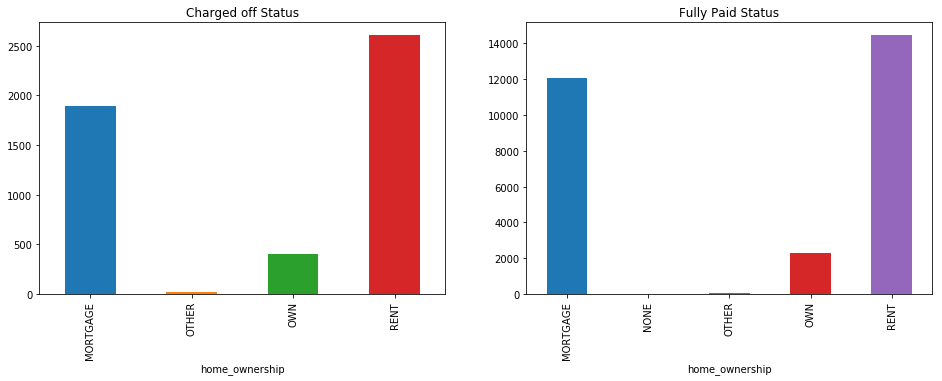

In [88]:
# loan status vs home ownership graph 
plt.subplot(1,2,1)
x=data.groupby('home_ownership')['loan_status'].value_counts().loc[:,'Charged Off']
x.plot.bar(figsize=(16,5),title='Charged off Status');

plt.subplot(1,2,2)
y=data.groupby('home_ownership')['loan_status'].value_counts().loc[:,'Fully Paid']
y.plot.bar(figsize=(16,5),title='Fully Paid Status');

# most of rent home ownership applicant has fully paid of status but in charged off category rent ownership is highest As well

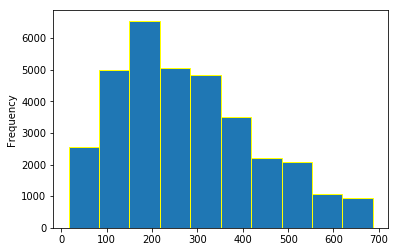

In [89]:
# histogram graph for installment 
data['installment'].plot.hist(edgecolor='yellow')

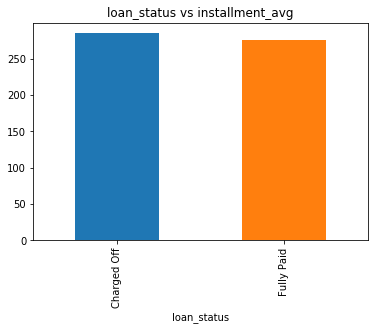

In [90]:
# loan status vs installment 
data.groupby('loan_status')['installment'].mean().plot.bar(title='loan_status vs installment_avg')
# we can clearly see that charged off status has more mean installment value then fully paid.

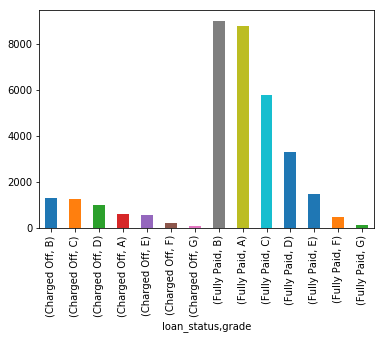

In [91]:
# loan status vs grade 
data.groupby('loan_status')['grade'].value_counts().plot.bar()
# b grade has higest charged off status as well as fully paid status

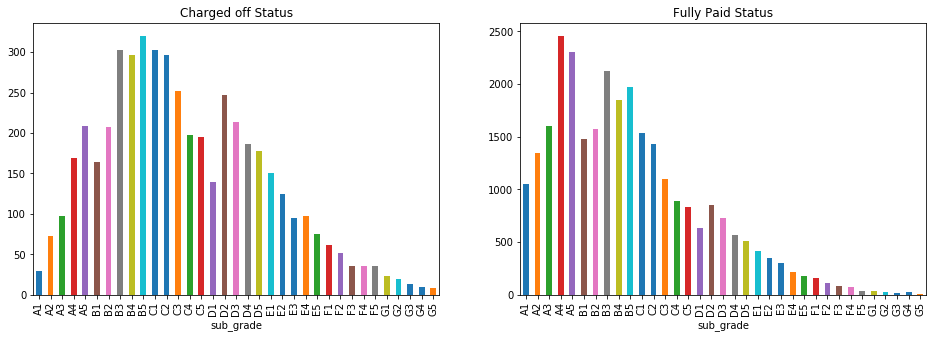

In [92]:
# loan status vs sub grade
plt.subplot(1,2,1)
l=data.groupby('sub_grade')['loan_status'].value_counts().loc[:,'Charged Off']
l.plot.bar(figsize=(16,5),title='Charged off Status');

plt.subplot(1,2,2)
m=data.groupby('sub_grade')['loan_status'].value_counts().loc[:,'Fully Paid']
m.plot.bar(figsize=(16,5),title='Fully Paid Status');
# in graph we can clearly see that in charged off B5 sub grade has highest and in fully paid A4 sub grade has highest

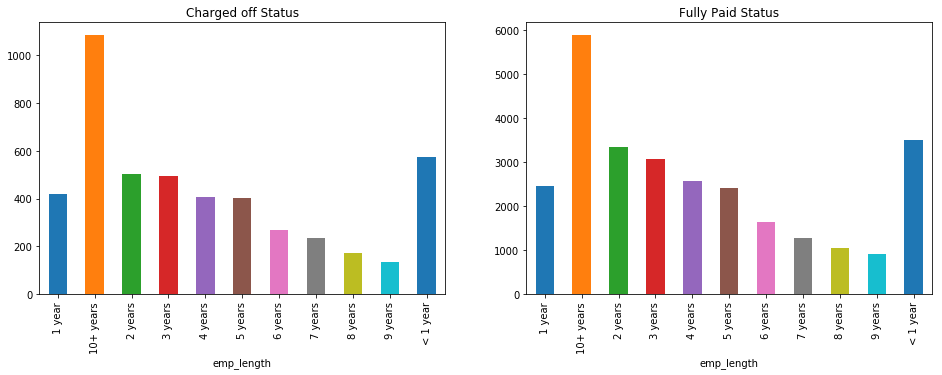

In [93]:
# aplicant employement experience for Charged off status
plt.subplot(1,2,1)
x=data.groupby('emp_length')['loan_status'].value_counts().loc[:,'Charged Off']
x.plot.bar(figsize=(16,5),title='Charged off Status');

plt.subplot(1,2,2)
y=data.groupby('emp_length')['loan_status'].value_counts().loc[:,'Fully Paid']
y.plot.bar(figsize=(16,5),title='Fully Paid Status');

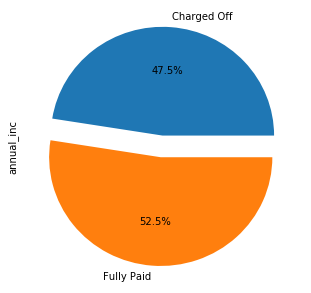

In [94]:
data.groupby('loan_status')['annual_inc'].mean().plot.pie(figsize=(5,5),explode=(0.1,0.1),autopct='%1.1f%%')

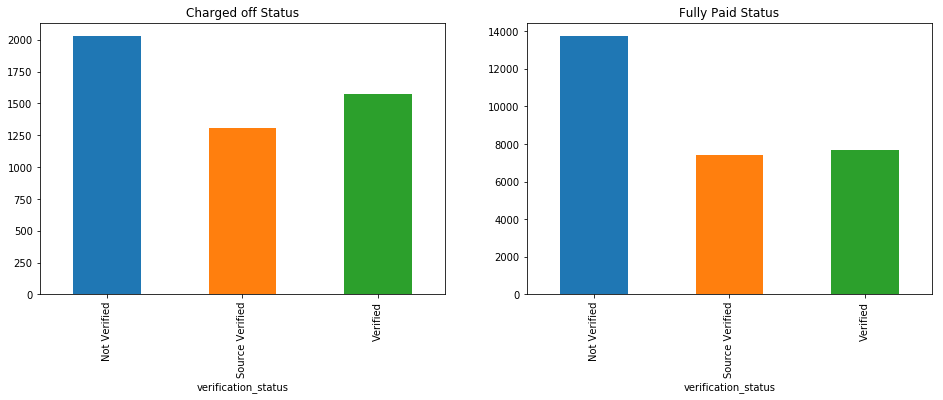

In [95]:
#varification vs loan status
plt.subplot(1,2,1)
x=data.groupby('verification_status')['loan_status'].value_counts().loc[:,'Charged Off']
x.plot.bar(figsize=(16,5),title='Charged off Status');

plt.subplot(1,2,2)
y=data.groupby('verification_status')['loan_status'].value_counts().loc[:,'Fully Paid']
y.plot.bar(figsize=(16,5),title='Fully Paid Status');

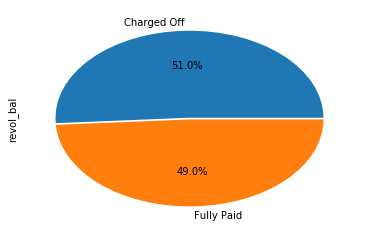

In [96]:
#Total credit revolving balance
data.groupby('loan_status')['revol_bal'].mean().plot.pie(explode=(0.01,0.01),autopct='%1.1f%%')

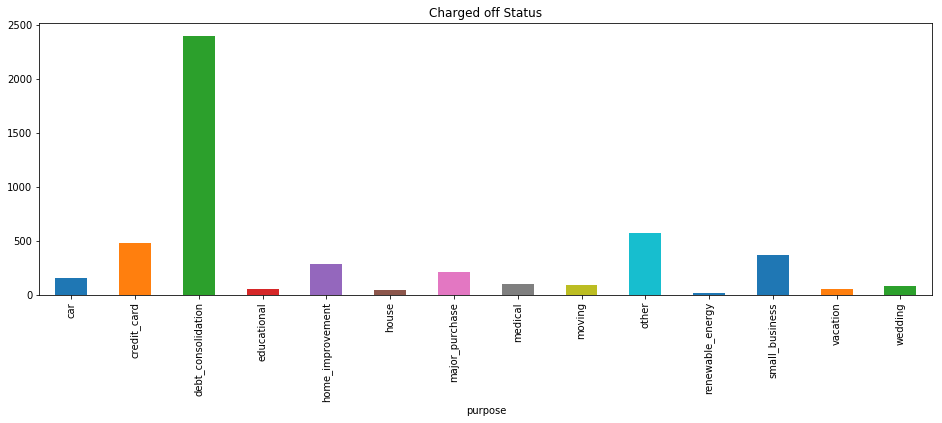

In [98]:
# purpose vs loan status
z=data.groupby('purpose')['loan_status'].value_counts().loc[:,'Charged Off']
z.plot.bar(figsize=(16,5),title='Charged off Status');


In [46]:
# title variable
data['title'].value_counts().sort_values(ascending=False).head(10)

Debt Consolidation           1766
Debt Consolidation Loan      1343
Personal Loan                 571
debt consolidation            411
Consolidation                 398
Credit Card Consolidation     316
Debt consolidation            276
Personal                      267
Home Improvement              266
Credit Card Loan              262
Name: title, dtype: int64

In [47]:
# analysis on zip code
data['zip_code'].nunique()

815

In [48]:
# top 10 zip code where most of applicant belong
data['zip_code'].value_counts().sort_values(ascending=False).head(10)

945xx    460
112xx    448
100xx    444
606xx    435
900xx    386
070xx    379
021xx    340
300xx    319
917xx    306
331xx    301
Name: zip_code, dtype: int64

In [49]:
# applicant address state
data['addr_state'].nunique()

50

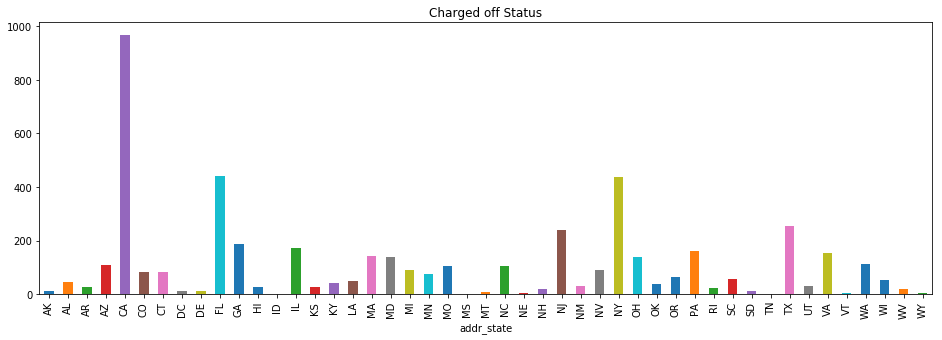

In [50]:
# loan status vs address state analysis for only charged off status
z=data.groupby('addr_state')['loan_status'].value_counts().loc[:,'Charged Off']
z.plot.bar(figsize=(16,5),title='Charged off Status');

In [51]:
# dti variable
data['dti'].describe()

count    33777.000000
mean        13.424361
std          6.683362
min          0.000000
25%          8.290000
50%         13.540000
75%         18.730000
max         29.990000
Name: dti, dtype: float64

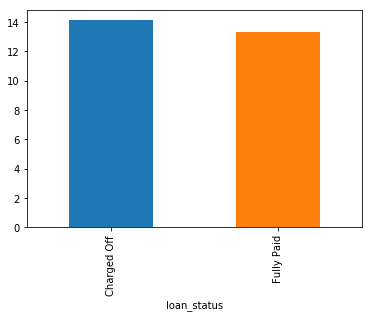

In [52]:

# A ratio calculated using the borrower’s total monthly debt payments on the total debt obligations, excluding mortgage 
# and the requested LC loan, divided by the borrower’s self-reported monthly income.

data.groupby('loan_status')['dti'].mean().plot.bar()

#Completed loans that are charged off tend to have higher debt-to-income ratios.

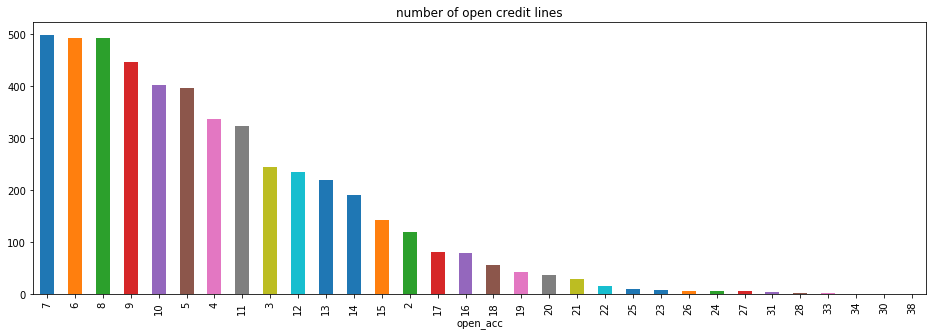

In [53]:
# open acc vs loan status for only charged off
x1=data.groupby('open_acc')['loan_status'].value_counts().loc[:,'Charged Off']
x1.sort_values(ascending=False).plot.bar(figsize=(16,5),title='number of open credit lines')

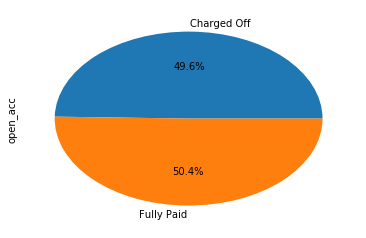

In [54]:
#The number of open credit lines in the borrower's credit file.
data.groupby('loan_status')['open_acc'].mean().plot.pie(autopct='%1.1f%%')


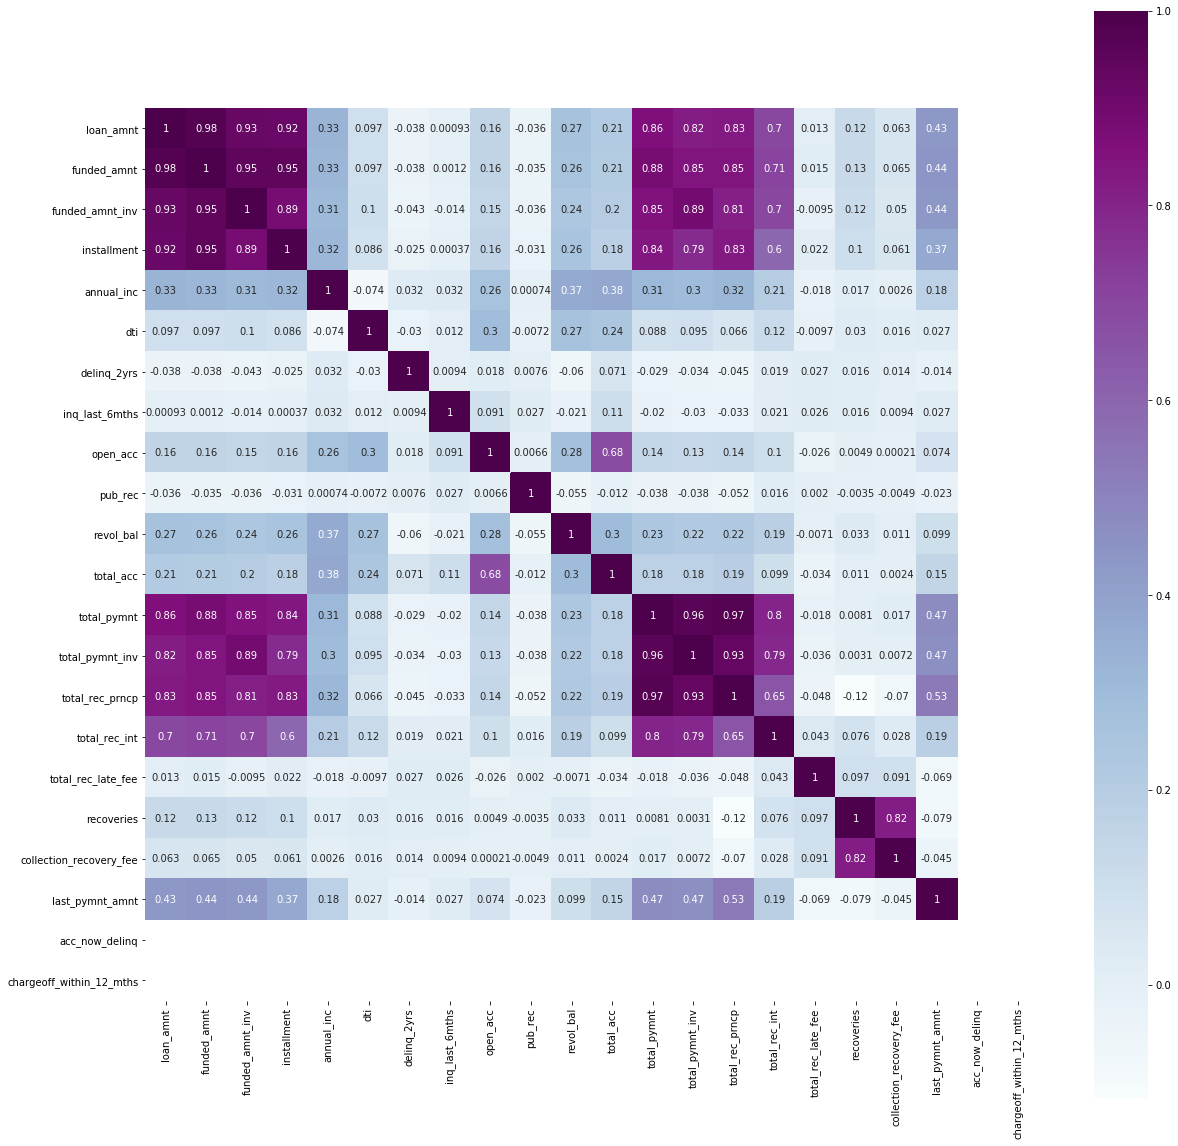

In [55]:
#corelation matrix 

matrix = data.corr()
f, ax = plt.subplots(figsize=(20,20))
sns.heatmap(matrix, vmax=1, square=True, cmap="BuPu", annot=True)

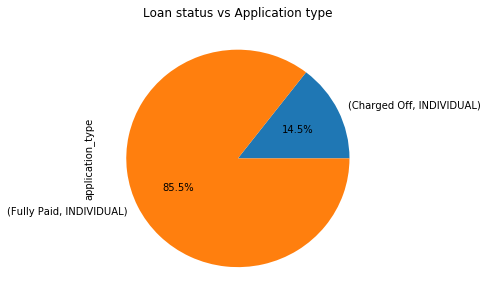

In [56]:
#loan vs application type
data.groupby('loan_status')['application_type'].value_counts().plot.pie(figsize=(5,5),autopct='%1.1f%%',title='Loan status vs Application type')